In [6]:
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import month, year, quarter
from pyspark.sql.functions import count
import matplotlib.pyplot as plt





<h1>Sales Dataframe</h1>

In [2]:
schema = StructType([
    StructField("product_id", IntegerType(), True),
    StructField("customer_id", StringType(), True),
    StructField("order_date", DateType(), True),
    StructField("location", StringType(), True),
    StructField("source_order", StringType(), True)
])
spark = SparkSession.builder.appName("MySparkApp").getOrCreate()

sales_df=spark.read.format("csv").option("inferschema","true").schema(schema).load("data/sales.csv.txt")

sales_df.show(5)

+----------+-----------+----------+--------+------------+
|product_id|customer_id|order_date|location|source_order|
+----------+-----------+----------+--------+------------+
|         1|          A|2023-01-01|   India|      Swiggy|
|         2|          A|2022-01-01|   India|      Swiggy|
|         2|          A|2023-01-07|   India|      Swiggy|
|         3|          A|2023-01-10|   India|  Restaurant|
|         3|          A|2022-01-11|   India|      Swiggy|
+----------+-----------+----------+--------+------------+
only showing top 5 rows



<h1>Deriving year, month, quarter </h1>

In [3]:
sales_df = sales_df.withColumn("order_year", year("order_date"))
sales_df = sales_df.withColumn("order_month", month("order_date"))
sales_df = sales_df.withColumn("order_quarter", quarter("order_date"))
sales_df.show(5)

+----------+-----------+----------+--------+------------+----------+-----------+-------------+
|product_id|customer_id|order_date|location|source_order|order_year|order_month|order_quarter|
+----------+-----------+----------+--------+------------+----------+-----------+-------------+
|         1|          A|2023-01-01|   India|      Swiggy|      2023|          1|            1|
|         2|          A|2022-01-01|   India|      Swiggy|      2022|          1|            1|
|         2|          A|2023-01-07|   India|      Swiggy|      2023|          1|            1|
|         3|          A|2023-01-10|   India|  Restaurant|      2023|          1|            1|
|         3|          A|2022-01-11|   India|      Swiggy|      2022|          1|            1|
+----------+-----------+----------+--------+------------+----------+-----------+-------------+
only showing top 5 rows



<h1>Menu dataframe</h1>

In [4]:
schema = StructType([
    StructField("product_id", IntegerType(), True),
    StructField("product_name", StringType(), True),
    StructField("price", StringType(), True)
])

menu_df=spark.read.format("csv").option("inferschema","true").schema(schema).load("data/menu.csv.txt")
menu_df.show(5)


+----------+------------+-----+
|product_id|product_name|price|
+----------+------------+-----+
|         1|       PIZZA|  100|
|         2|     Chowmin|  150|
|         3|    sandwich|  120|
|         4|        Dosa|  110|
|         5|     Biryani|   80|
+----------+------------+-----+
only showing top 5 rows



<h1>Total amount spent by each customer</h1>

In [5]:
total_amount_spent = (sales_df.join(menu_df, "product_id")
    .groupBy("customer_id")
    .agg({'price': 'sum'})
    .orderBy("customer_id"))

total_amount_spent.show(5)

+-----------+----------+
|customer_id|sum(price)|
+-----------+----------+
|          A|    4260.0|
|          B|    4440.0|
|          C|    2400.0|
|          D|    1200.0|
|          E|    2040.0|
+-----------+----------+



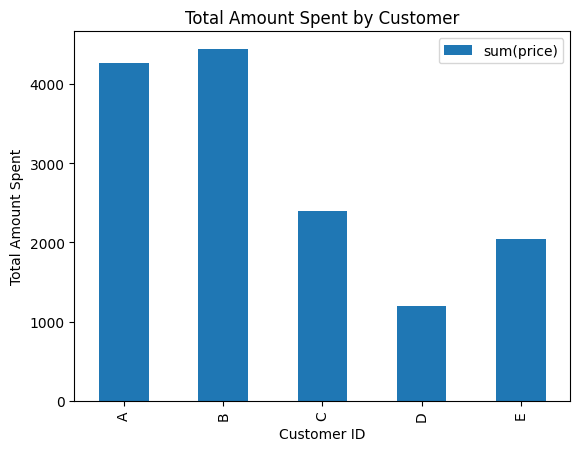

In [7]:

# Convert the Spark DataFrame to a Pandas DataFrame
total_amount_spent_pd = total_amount_spent.toPandas()

# Plot the total amount spent
total_amount_spent_pd.plot(x='customer_id', y='sum(price)', kind='bar')

# Set the plot title and labels
plt.title('Total Amount Spent by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')

# Show the plot
plt.show()

<h1>Total amount spent by each food category</h1>

In [8]:
total_amount_spent = (sales_df.join(menu_df, "product_id")
    .groupBy("product_name")
    .agg({'price': 'sum'})
    .orderBy("product_name"))

total_amount_spent.show(5)

+------------+----------+
|product_name|sum(price)|
+------------+----------+
|     Biryani|     480.0|
|     Chowmin|    3600.0|
|        Dosa|    1320.0|
|       PIZZA|    2100.0|
|       Pasta|    1080.0|
+------------+----------+
only showing top 5 rows



<h1>Total amount of sales in each month</h1>

In [9]:
df1=(sales_df.join(menu_df, "product_id")
    .groupBy("order_month")
    .agg({'price': 'sum'}).orderBy("order_month"))
df1.show(5)

+-----------+----------+
|order_month|sum(price)|
+-----------+----------+
|          1|    2960.0|
|          2|    2730.0|
|          3|     910.0|
|          5|    2960.0|
|          6|    2960.0|
+-----------+----------+
only showing top 5 rows



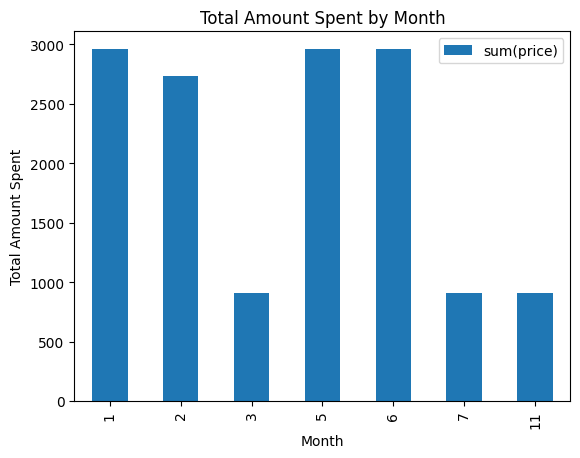

In [10]:
# Convert the Spark DataFrame to a Pandas DataFrame
total_amount_spent_pd = df1.toPandas()

# Plot the total amount spent
total_amount_spent_pd.plot(x='order_month', y='sum(price)', kind='bar')
# Set the plot title and labels
plt.title('Total Amount Spent by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
# Show the plot
plt.show()

<h1>Yearly sales</h1>

In [12]:
total_amount_spent_year=(sales_df.join(menu_df, "product_id")
    .groupBy("order_year")
    .agg({'price': 'sum'}).orderBy("order_year"))
total_amount_spent_year.show(5)

+----------+----------+
|order_year|sum(price)|
+----------+----------+
|      2022|    4350.0|
|      2023|    9990.0|
+----------+----------+



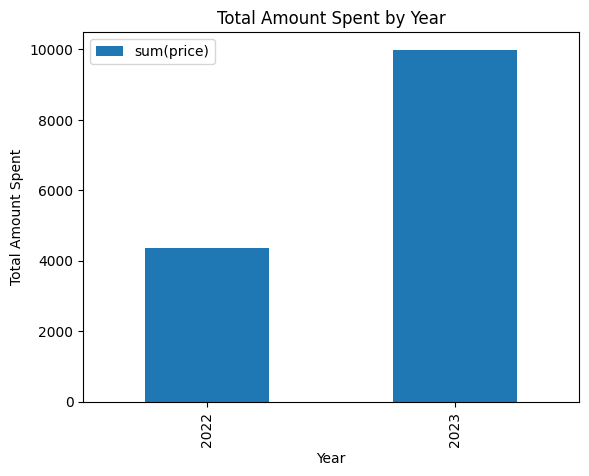

In [13]:
total_amount_spent_pd = total_amount_spent_year.toPandas()

# Plot the total amount spent
total_amount_spent_pd.plot(x='order_year', y='sum(price)', kind='bar')
# Set the plot title and labels
plt.title('Total Amount Spent by Year')
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
# Show the plot
plt.show()

<h1>Quaterly sales</h1>

In [14]:
total_amount_spent_quarter=(sales_df.join(menu_df, "product_id")
    .groupBy("order_quarter")
    .agg({'price': 'sum'}).orderBy("order_quarter"))
total_amount_spent_quarter.show(5)

+-------------+----------+
|order_quarter|sum(price)|
+-------------+----------+
|            1|    6600.0|
|            2|    5920.0|
|            3|     910.0|
|            4|     910.0|
+-------------+----------+



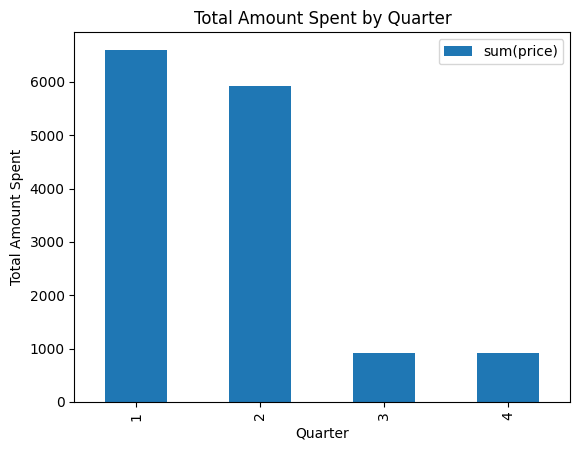

In [15]:
total_amount_spent_pd = total_amount_spent_quarter.toPandas()

# Plot the total amount spent
total_amount_spent_pd.plot(x='order_quarter', y='sum(price)', kind='bar')
# Set the plot title and labels
plt.title('Total Amount Spent by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Amount Spent')
# Show the plot
plt.show()

<h1>Top 5 order items</h1>

In [16]:
top_product_id = sales_df.groupBy("product_id").count().orderBy("count", ascending=False)
top_product_id.show(5)

+----------+-----+
|product_id|count|
+----------+-----+
|         3|   48|
|         2|   24|
|         1|   21|
|         4|   12|
|         6|    6|
+----------+-----+
only showing top 5 rows



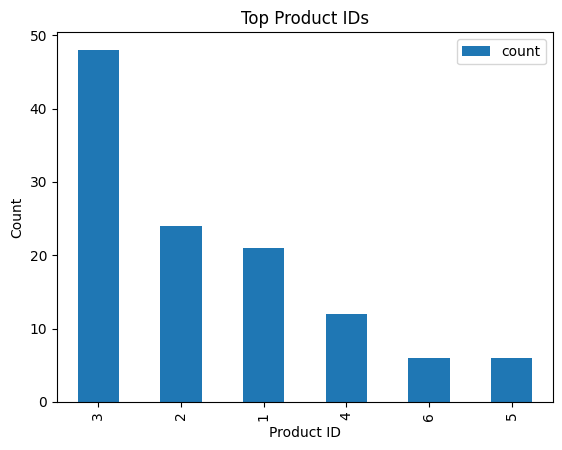

In [17]:
top_product_id_pd = top_product_id.toPandas()

# Plot the top product IDs
top_product_id_pd.plot(x='product_id', y='count', kind='bar')
# Set the plot title and labels
plt.title('Top Product IDs')
plt.xlabel('Product ID')
plt.ylabel('Count')
# Show the plot
plt.show()

<h1>Frequency visitors</h1>

In [18]:
top_customers = sales_df.groupBy("customer_id").agg({"product_id": "count"}).orderBy("count(product_id)", ascending=False)
top_customers.show(5)

+-----------+-----------------+
|customer_id|count(product_id)|
+-----------+-----------------+
|          B|               36|
|          A|               33|
|          E|               18|
|          C|               18|
|          D|               12|
+-----------+-----------------+



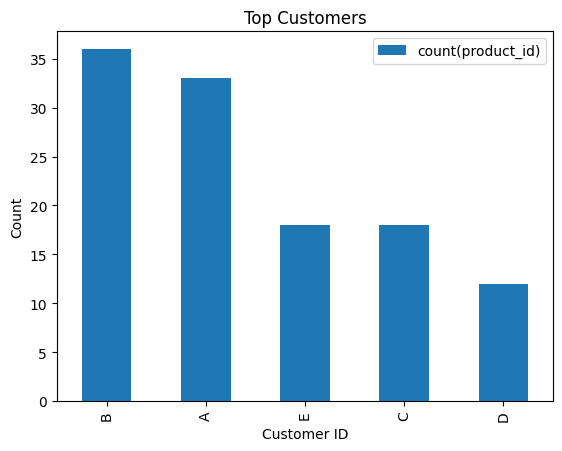

In [19]:
top_customers_pd = top_customers.toPandas()

# Plot the top customers
top_customers_pd.plot(x='customer_id', y='count(product_id)', kind='bar')
# Set the plot title and labels
plt.title('Top Customers')
plt.xlabel('Customer ID')
plt.ylabel('Count')
# Show the plot
plt.show()

<h1>Total sales by each country</h1>

In [20]:
top_sales_country = sales_df.groupBy("location").agg({"product_id": "count"}).orderBy("count(product_id)", ascending=False)
top_sales_country.show()

+--------+-----------------+
|location|count(product_id)|
+--------+-----------------+
|      UK|               57|
|   India|               39|
|     USA|               21|
+--------+-----------------+



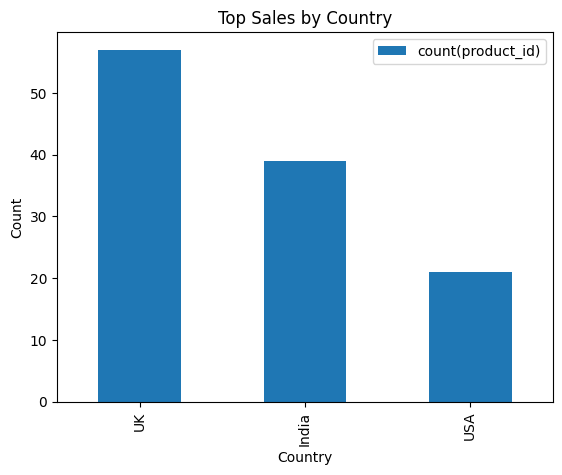

In [21]:
top_sales_country_pd = top_sales_country.toPandas()

# Plot the top sales by country
top_sales_country_pd.plot(x='location', y='count(product_id)', kind='bar')
# Set the plot title and labels
plt.title('Top Sales by Country')
plt.xlabel('Country')
plt.ylabel('Count')
# Show the plot
plt.show()

<h1>Total sales by order source</h1>

In [22]:
total_sales_order_source = sales_df.groupBy("source_order").agg({"product_id": "count"}).orderBy("count(product_id)", ascending=False)
total_sales_order_source.show()

+------------+-----------------+
|source_order|count(product_id)|
+------------+-----------------+
|      Swiggy|               51|
|      zomato|               39|
|  Restaurant|               27|
+------------+-----------------+



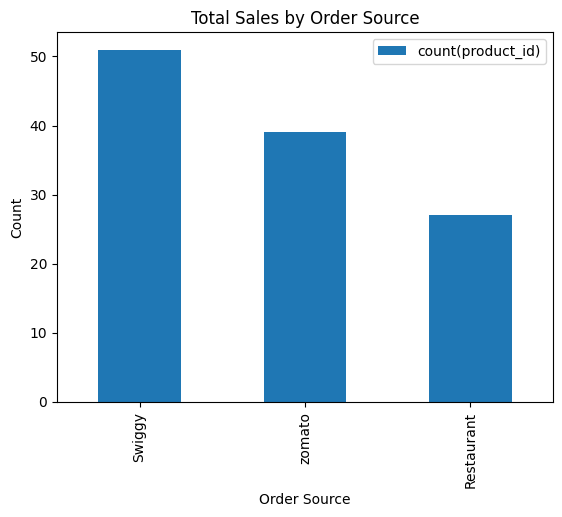

In [23]:
total_sales_order_source_pd = total_sales_order_source.toPandas()

# Plot the total sales by order source
total_sales_order_source_pd.plot(x='source_order', y='count(product_id)', kind='bar')
# Set the plot title and labels
plt.title('Total Sales by Order Source')
plt.xlabel('Order Source')

plt.ylabel('Count')
# Show the plot
plt.show()